In [2]:

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plot
from matplotlib.ticker import FuncFormatter
from io import StringIO as st
%matplotlib inline

In [3]:
DATA_DIR='F:\Data_Science\Capstone\FEC Campaign Finance Data'

## Reading the CSV Files 

In [4]:
CONTRIBUTOR = "{0}/CONTRIBUTOR.csv".format(DATA_DIR)
Expenditure= "{0}/Expenditure.csv".format(DATA_DIR)
Summary= "{0}/report_summaries_form_3p.csv".format(DATA_DIR)
pd.options.display.float_format='{:.9f}'.format

In [48]:
test_cont=pd.read_csv(CONTRIBUTOR,index_col=False)

C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
exp=pd.read_csv(Expenditure,index_col=False)

C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
summ=pd.read_csv(Summary,index_col=False)

## Changing the Amounts in Millions 

In [50]:
test_cont.contb_receipt_amt=test_cont.contb_receipt_amt/1000000

In [53]:
exp.disb_amt=exp.disb_amt/1000000

##Creating a Dataset with Committee and Received Amount Details 

In [54]:
cont_amt=test_cont[['cmte_id','cand_nm','contb_receipt_amt','election_tp']].reset_index(drop=True)

## Adding the Received amount as Committee Level 

In [55]:
exp_cmt=pd.DataFrame(cont_amt.groupby(['cmte_id','cand_nm','election_tp'])['contb_receipt_amt'].sum()).reset_index(drop=False)

In [56]:
exp_cmt.contb_receipt_amt=exp_cmt.contb_receipt_amt.apply(pd.to_numeric)

In [57]:
exp_cmt=exp_cmt.sort_values('contb_receipt_amt',ascending=False)


## Bar Graph between Condidates and the Contribution Received to their Committee 

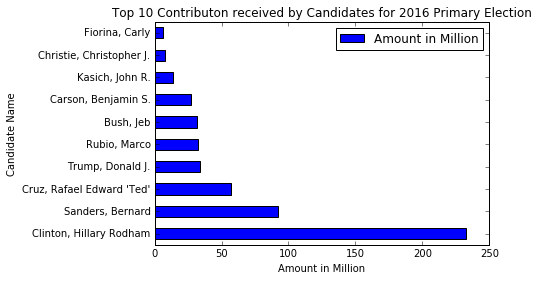

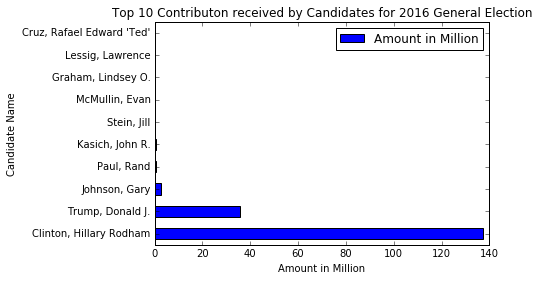

In [63]:
exp_cmt[exp_cmt.election_tp=='P2016'].head(10).plot.barh(x='cand_nm',y='contb_receipt_amt')
plot.xlabel('Amount in Million')
plot.ylabel('Candidate Name')
plot.title('Top 10 Contribution received by Candidates for 2016 Primary Election')
L=plot.legend()
L.get_texts()[0].set_text('Amount in Million')
exp_cmt[exp_cmt.election_tp=='G2016'].head(10).plot.barh(x='cand_nm',y='contb_receipt_amt')
plot.xlabel('Amount in Million')
plot.ylabel('Candidate Name')
plot.title('Top 10 Contribution received by Candidates for 2016 General Election')
L=plot.legend()
L.get_texts()[0].set_text('Amount in Million')

## Creating a Dataset with Contributer details and Contributed Amount 

In [64]:
cont_det=test_cont[['contbr_nm','contbr_city','contb_receipt_amt','election_tp']].reset_index(drop=True)

In [65]:
cont_by_contbr=cont_det.groupby(['contbr_nm','election_tp'])['contb_receipt_amt'].sum().reset_index(drop=False).sort_values('contb_receipt_amt',ascending=False).reset_index(drop=True)

In [66]:
cont_by_city=cont_det.groupby(['contbr_city','election_tp'])['contb_receipt_amt'].sum().reset_index(drop=False).sort_values('contb_receipt_amt',ascending=False).reset_index(drop=True)

## Bar Graph between Contributer and the Contibuted amount 

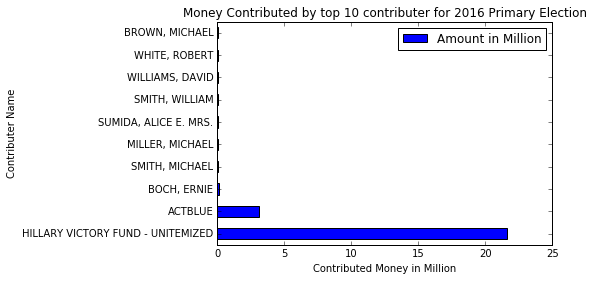

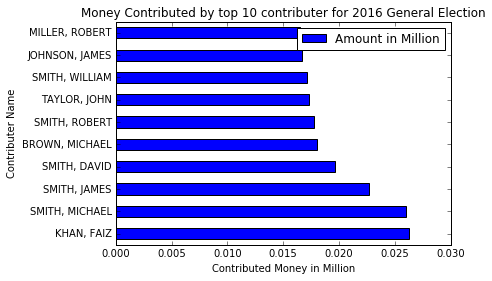

In [67]:
cont_by_contbr[cont_by_contbr.election_tp=='P2016'].head(10).plot.barh(x='contbr_nm',y='contb_receipt_amt')
plot.ylabel('Contributer Name')
plot.xlabel('Contributed Money in Million')
plot.title('Money Contributed by top 10 contributer for 2016 Primary Election')
L=plot.legend()
L.get_texts()[0].set_text('Amount in Million')
cont_by_contbr[cont_by_contbr.election_tp=='G2016'].head(10).plot.barh(x='contbr_nm',y='contb_receipt_amt')
plot.ylabel('Contributer Name')
plot.xlabel('Contributed Money in Million')
plot.title('Money Contributed by top 10 contributer for 2016 General Election')
L=plot.legend()
L.get_texts()[0].set_text('Amount in Million')

In [68]:
cont_by_city.contb_receipt_amt=cont_by_city.contb_receipt_amt.apply(pd.to_numeric)

## Contributed Money from different Cities 

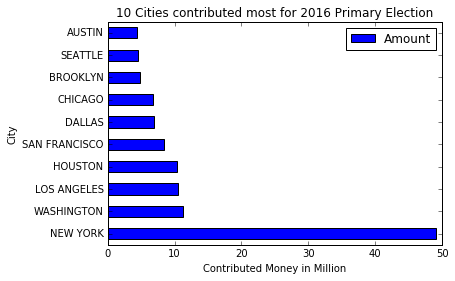

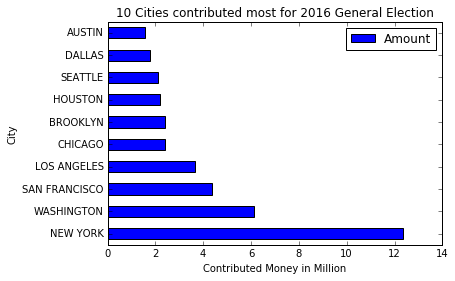

In [70]:
cont_by_city[cont_by_city.election_tp=='P2016'].head(10).plot.barh(x='contbr_city',y='contb_receipt_amt')
plot.ylabel('City')
plot.xlabel('Contributed Money in Million')
plot.title('10 Cities contributed most for 2016 Primary Election')
L=plot.legend()
L.get_texts()[0].set_text('Amount')
cont_by_city[cont_by_city.election_tp=='G2016'].head(10).plot.barh(x='contbr_city',y='contb_receipt_amt')
plot.ylabel('City')
plot.xlabel('Contributed Money in Million')
plot.title('10 Cities contributed most for 2016 General Election')
L=plot.legend()
L.get_texts()[0].set_text('Amount')

## Candidates who received amd spent most of the money 

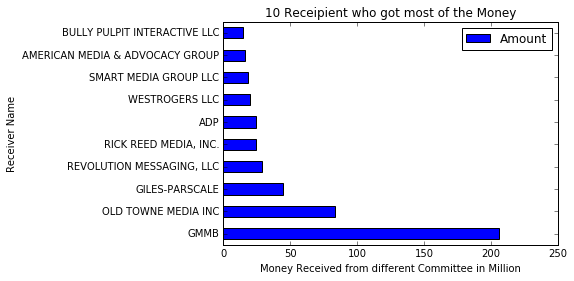

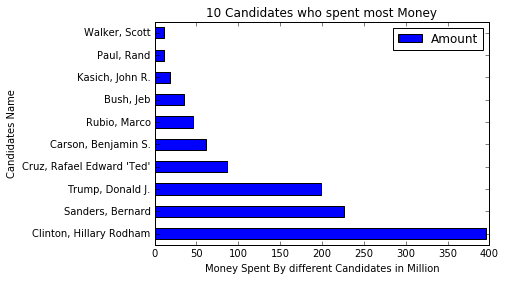

In [72]:
exp[['cand_nm','recipient_nm','disb_amt','election_tp']].\
groupby(['recipient_nm'])['disb_amt'].sum().\
reset_index(drop=False).sort_values('disb_amt',ascending=False).reset_index(drop=True).head(10).\
plot.barh(x='recipient_nm',y='disb_amt')

plot.xlabel('Money Received from different Committee in Million')
plot.ylabel('Receiver Name')
plot.title('10 Receipient who got most of the Money')
L=plot.legend()
L.get_texts()[0].set_text('Amount')


exp[['cand_nm','recipient_nm','disb_amt','election_tp']].\
groupby(['cand_nm'])['disb_amt'].sum().\
reset_index(drop=False).sort_values('disb_amt',ascending=False).reset_index(drop=True).head(10).\
plot.barh(x='cand_nm',y='disb_amt')

plot.xlabel('Money Spent By different Candidates in Million')
plot.ylabel('Candidates Name')
plot.title('10 Candidates who spent most Money')
L=plot.legend()
L.get_texts()[0].set_text('Amount')

## Top source of contribution for different Committee 

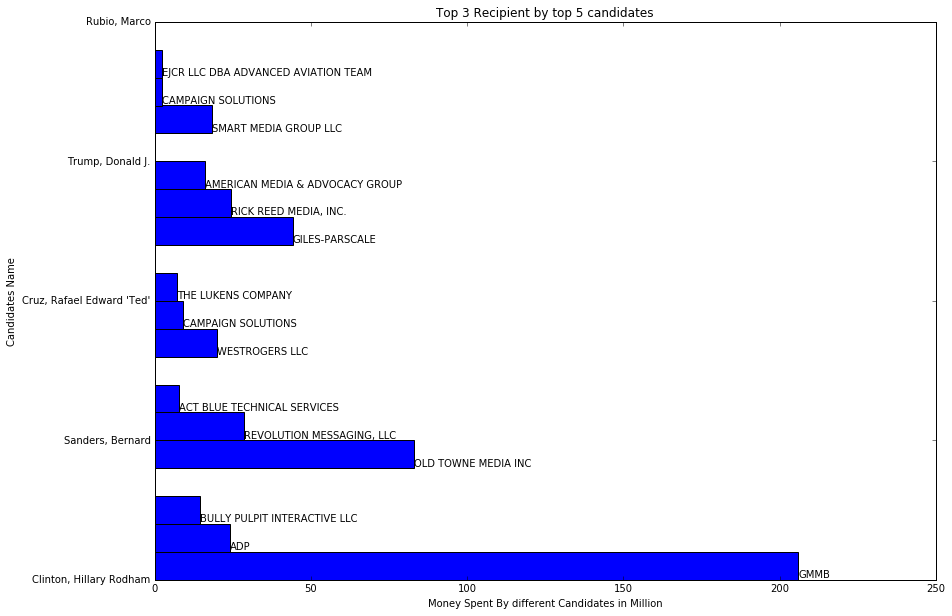

In [73]:
a=pd.DataFrame(columns=['recipient_nm','disb_amt','cand_nm'])
ind = np.arange(3) 
x = np.arange(5)
width = 0.35
j=0
x_labels=[1,2,3]
fig, ax = plot.subplots()
for i,row in exp_cmt[exp_cmt.election_tp=='P2016'].head(5).iterrows():
    z=(exp[exp.cmte_id==row.cmte_id].groupby(['recipient_nm'])['disb_amt'].sum().\
    reset_index(drop=False).sort_values('disb_amt',ascending=False).reset_index(drop=True).head(3))
    z['cand_nm']=row.cand_nm
    a=a.append(z, ignore_index=True)
    a1=ax.barh(ind+j,z.disb_amt,1)
    ax.set_yticklabels((a.cand_nm.drop_duplicates()))
    j=j+4
rects = ax.patches
for rect, label, amt in zip(rects, a.recipient_nm,a.disb_amt):
    height = rect.get_height()
    ax.text(amt,rect.get_y(),  label, ha='left', va='bottom')
plot.xlabel('Money Spent By different Candidates in Million')
plot.ylabel('Candidates Name')
plot.title('Top 3 Recipient by top 5 candidates')
fig.set_size_inches((14,10))
fig.set_dpi(800)

In [79]:
colums=['CMTE_ID','CMTE_NM','CAND_ID','RPT_YR','RPT_TP','TTL_CONTB_PER','TTL_RECEIPTS_PER','TTL_DISB_PER']

In [80]:
cmte_dtls=summ[colums]

In [81]:
cmte_dtls['month']=(summ.RPT_TP.str.slice(1))

C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
mydata = [{'Digit' : 1, 'Month':'Jan'},
          {'Digit' : 2, 'Month':'Feb'},
          {'Digit' : 3, 'Month':'Mar'},
          {'Digit' : 4, 'Month':'Apr'},
          {'Digit' : 5, 'Month':'May'},
          {'Digit' : 6, 'Month':'Jun'},
          {'Digit' : 7, 'Month':'Jul'},
          {'Digit' : 8, 'Month':'Aug'},
          {'Digit' : 9, 'Month':'Sep'},
          {'Digit' : 10, 'Month':'Oct'},
          {'Digit' : 11, 'Month':'Nov'},
          {'Digit' : 12, 'Month':'Dec'},
          ]
month = pd.DataFrame(mydata)

In [83]:
#cmte_dtls.dtypes
cmte_dtls.month=cmte_dtls['month'].convert_objects(convert_numeric=True)

C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


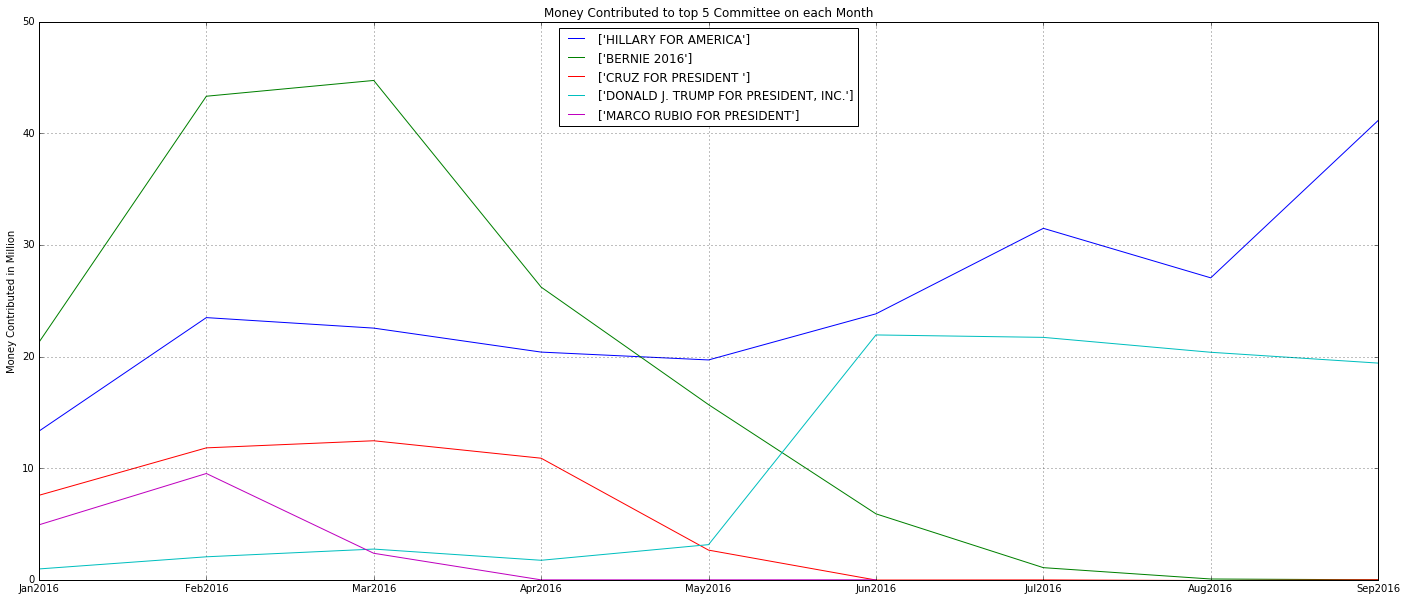

In [85]:
fig, ax = plot.subplots()
plot.hold(True)
for row in exp_cmt[exp_cmt.election_tp=='P2016'].head(5).cmte_id:
    h=cmte_dtls[(cmte_dtls.CMTE_ID==row)&(cmte_dtls.RPT_TP.str.startswith('M'))].sort_values(['RPT_YR','month'])
    ax.plot((h.month),h.TTL_CONTB_PER/1000000,label=cmte_dtls[cmte_dtls.CMTE_ID==row].CMTE_NM.drop_duplicates().values)
ax.set_xticklabels(month.Month+'2016')

fig.set_size_inches((24,10))
fig.set_dpi(800)
ax.grid(True)
ax.legend(loc='best')
ax.xaxis_date
ax.set_ylim(0)
ax.set_ylabel('Money Contributed in Million' )
plot.title('Money Contributed to top 5 Committee on each Month')

#ax.xaxis.set_major_locator(cmte_dtls.CAND_ID)

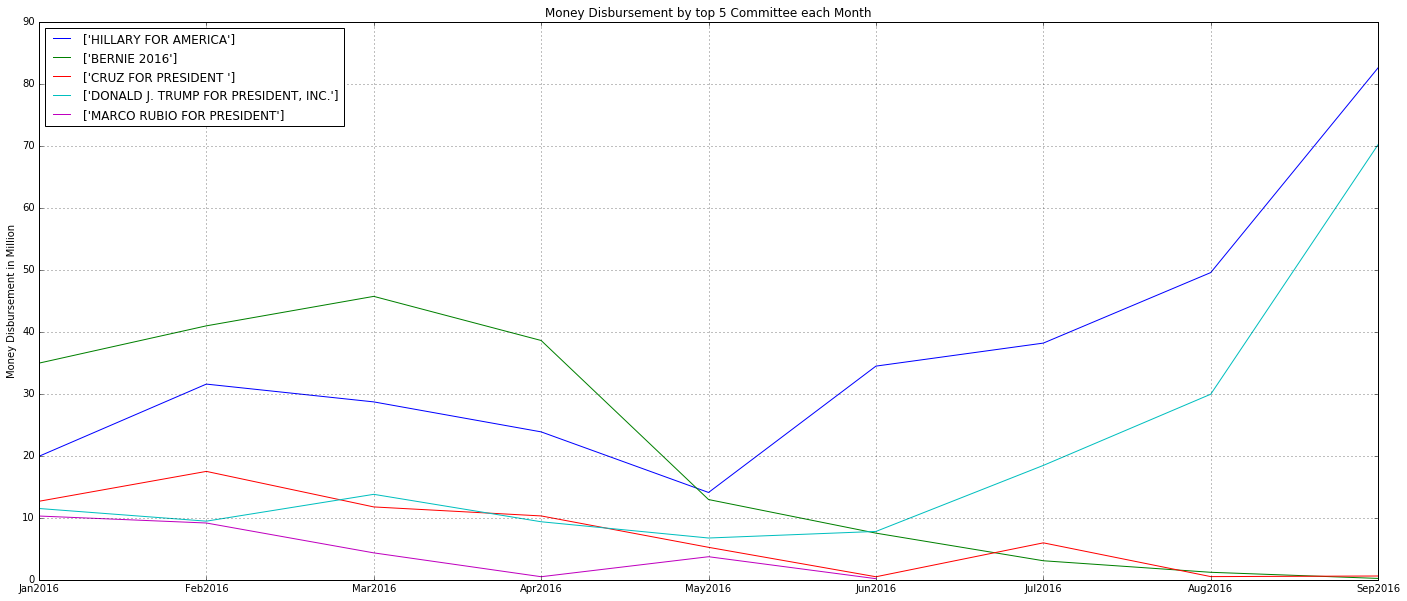

In [87]:
fig, ax = plot.subplots()
plot.hold(True)
for row in exp_cmt[exp_cmt.election_tp=='P2016'].head(5).cmte_id:
    h=cmte_dtls[(cmte_dtls.CMTE_ID==row)&(cmte_dtls.RPT_TP.str.startswith('M'))].sort_values(['RPT_YR','month'])
    ax.plot((h.month),h.TTL_DISB_PER/1000000,label=cmte_dtls[cmte_dtls.CMTE_ID==row].CMTE_NM.drop_duplicates().values)
ax.set_xticklabels(month.Month+'2016')

fig.set_size_inches((24,10))
fig.set_dpi(800)
ax.grid(True)
ax.legend(loc='best')
ax.xaxis_date
ax.set_ylim(0)
ax.set_ylabel('Money Disbursement in Million' )
plot.title('Money Disbursement by top 5 Committee each Month')

#ax.xaxis.set_major_locator(cmte_dtls.CAND_ID)